In [ ]:
import pandas as pd

file_path = '/content/data_with_missing.xlsx'
data = pd.read_excel(file_path)

# Show the first 5 rows
print(data.head())

# Check where missing values are
print("\nMissing values:\n", data.isnull().sum())

# Select numeric columns
numeric_cols = data.select_dtypes(include=['number']).columns
print("Numeric columns:", numeric_cols)

# Fill missing values in numeric columns with their mean
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Show data after filling
print("\nData after filling numeric missing values:\n", data.head())

       price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  condition  \
0   313000.0       3.0       1.50         1340      7912     1.5          3   
1  2384000.0       5.0       2.50         3650      9050     2.0          5   
2   342000.0       NaN       2.00         1930     11947     1.0          4   
3   420000.0       NaN       2.25         2000      8030     1.0          4   
4   550000.0       4.0       2.50         1940     10500     1.0          4   

   sqft_above  sqft_basement  yr_built  yr_renovated  \
0        1340              0      1955          2005   
1        3370            280      1921             0   
2        1930              0      1966             0   
3        1000           1000      1963             0   
4        1140            800      1976          1992   

                     street       city  statezip  Location  
0      18810 Densmore Ave N  Shoreline  WA 98133  Downtown  
1           709 W Blaine St    Seattle  WA 98119  Downtown  
2  26

       price bedrooms  bathrooms  sqft_living  sqft_lot  floors  condition  \
0   313000.0        3       1.50       1340.0    7912.0     1.5        3.0   
1  2384000.0        5       2.50       3650.0    9050.0     2.0        5.0   
2   342000.0      NaN       2.00       1930.0   11947.0     1.0        4.0   
3   420000.0      NaN       2.25       2000.0    8030.0     1.0        4.0   
4   550000.0        4       2.50       1940.0   10500.0     1.0        4.0   

   sqft_above  sqft_basement  Location  
0      1340.0            0.0  Downtown  
1      3370.0          280.0  Downtown  
2      1930.0            0.0  Downtown  
3      1000.0         1000.0  Suburban  
4      1140.0          800.0  Downtown  
R² Score: 0.4386
RMSE: 165096.78


<ipython-input-7-7caae36431c3>:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace(' ', np.nan)


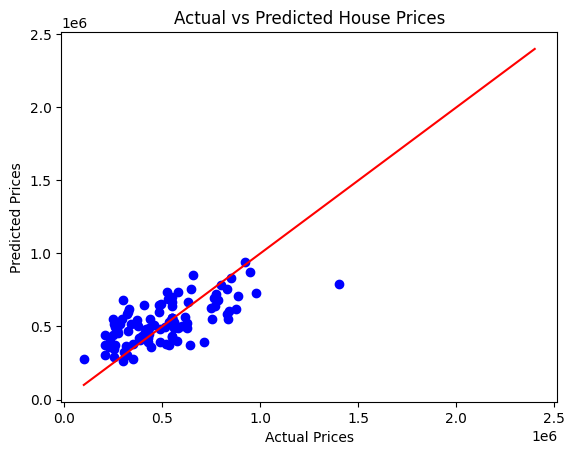

In [ ]:
#QUES 1-- HOUSE PRICE PREDICTION
# 1. Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

# 2. Load the dataset
file_path = '/content/DATA.xlsx'
data = pd.read_excel(file_path)

# 3. Preprocess Data
print(data.head())

# Remove empty strings
data = data.replace(' ', np.nan)

# Fill missing numerical values
data = data.fillna(data.mean(numeric_only=True))

# Fill missing categorical values
if 'Location' in data.columns:
    data['Location'] = data['Location'].fillna(data['Location'].mode()[0])

# Encode categorical features
le = LabelEncoder()
if data['Location'].dtype == 'object' or data['Location'].dtype.name == 'category':
    data['Location'] = le.fit_transform(data['Location'])

# 4. Define Features and Target
X = data.drop('price', axis=1)
y = data['price']

# 5. Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Build and Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 7. Make Predictions
y_pred = model.predict(X_test)

# 8. Evaluate the model
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")

# 9. Visualize the predictions
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()
